In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
              filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [13]:
cnn.compile(loss='sparse_categorical_crossentropy',
           optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [14]:
hist = cnn.fit(x_train, y_train, batch_size=128,
              epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 92s 195ms/step - loss: 0.2363 - accuracy: 0.9279 - val_loss: 0.0493 - val_accuracy: 0.9838
Epoch 2/30
469/469 [==============================] - 96s 205ms/step - loss: 0.0832 - accuracy: 0.9756 - val_loss: 0.0409 - val_accuracy: 0.9863
Epoch 3/30
469/469 [==============================] - 95s 204ms/step - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0329 - val_accuracy: 0.9882
Epoch 4/30
469/469 [==============================] - 95s 202ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.0319 - val_accuracy: 0.9889
Epoch 5/30
469/469 [==============================] - 95s 203ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0319 - val_accuracy: 0.9893
Epoch 6/30
469/469 [==============================] - 95s 202ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0266 - val_accuracy: 0.9923
Epoch 7/30
469/469 [==============================] - 94s 201ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0283 - val_ac

In [15]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0318 - accuracy: 0.9930


[0.03184640035033226, 0.9929999709129333]

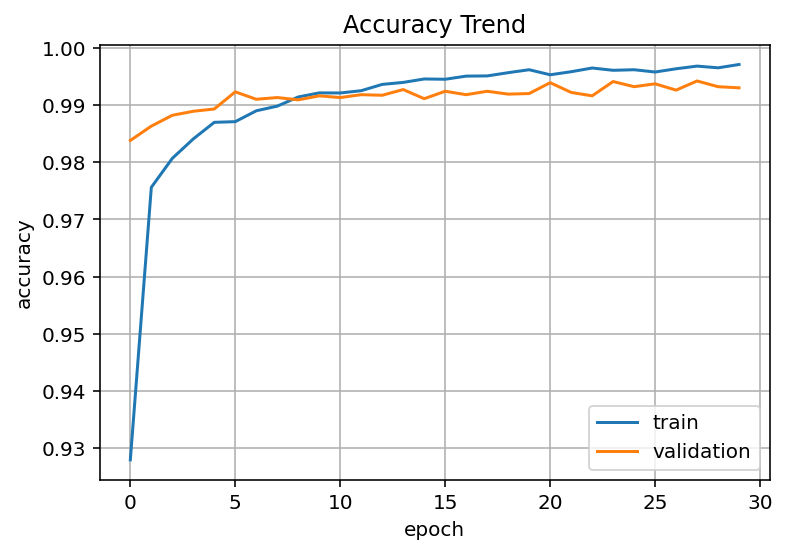

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

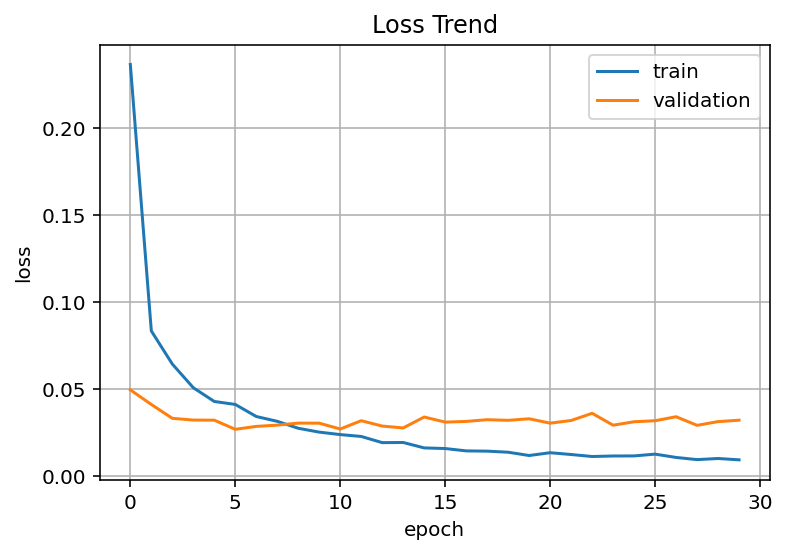

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()